### Introduction

After some consideration we've decided to change the scope of our project. We felt that predicting the popularity of an album before it's release was an unattainable goal considering the time and data available to us. As it stands, we are going to wait until the album is released and test each track individually to predict whether or not it will be on the charts. It is no secret the popularity of a song is heavily based in the cultural climate at the time. Regardless, we are going to ignore cultural influence and concentrate on the tracks features. The features in question are as follows:

- Danceability - how suitable a track is for dancing based on a combination of musical  elements as well as overall regularity.
- Energy - how intense or active a track is. Death metal is high energy while a Claire de Lune is low energy. 
- Loudness - the overall loudness of a track measured in decibels, averaged across the track
- Tempo - the tempo in beats per minutes
- Valence - measure describing the musical positiveness; high valence sounds positive while low valence sounds negative

Below is some code to import the necessary modules. The modules are imported to make the data analysis and visualization process go more smoothly. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import pylab as plt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import stats

### Data From The Last Century 

The csv file imported below contains data on the Billboard Hot 100 songs for the last century. In reality the data goes back as far as Billboard.com has data, which is mid way through 1958. The data retrieved from Billboard.com contained a good deal of metadata associated with the chart. All the metadata was deleted save for the track name and the artist. A new dataset was formed by using the Spotify api to retrieve the features of the Hot 100 for a given date and averaging the features for the date. Spotify did not have information on every track in the file. These entries were removed. A more detailed notebook on this process is included at the following endpoint, /Processing/Processing/billboard_past_century 

In [2]:
top_100_c = pd.read_csv('billboard_top_100_last_century_features.csv',na_values="Unnamed: 0")

What used to be the index column in the csv file is stored in the first column of this new dataframe. It's easy enough to set the index column before reading in the data, but this would lead to more issues down the line due to the format of the csv. The dates in the csv file are stored as strings, which is unrecognized by the plotting tools from matplotlib and pandas. This column was converted to datetime object by pandas function "to_datetime". Next, these datetime objects were set as the index column. 

In [3]:
top_100_c["Unnamed: 0"] = pd.to_datetime(top_100_c["Unnamed: 0"])

top_100_c.index = top_100_c["Unnamed: 0"]
del top_100_c["Unnamed: 0"]


top_100_c.index.name="Date"

Here, we calculate the Pearson correlation coefficient to find if any of our current mertics are highly correlated with each other. We chose to use the Pearson correlation instead of Spearman because all of the metrics we compare are continuous.
We can see that energy and loundess are the most closely correlated with a correlation coefficient of -.905, implying that as the energy increases loudness decreases and vice versa. However, we believe that this is due to the fact that both metrics have strong and opposite relations with time.

In [20]:
top_100_c.corr()

,danceability,energy,loudness,tempo,valence
danceability,1.000000,0.675182,-0.659243,-0.012474,-0.456190
energy,0.675182,1.000000,-0.870506,0.243876,-0.487737
loudness,-0.659243,-0.870506,1.000000,-0.216852,0.682420
tempo,-0.012474,0.243876,-0.216852,1.000000,-0.112769
valence,-0.456190,-0.487737,0.682420,-0.112769,1.000000


The charts that follow are line graphs of how the various song features have changed over the last eighty years or so. Some of the trends do not align with our previous prediction. Namely, loudness has gone down significantly since the 60's. 

Text(0.5,0,'Date')

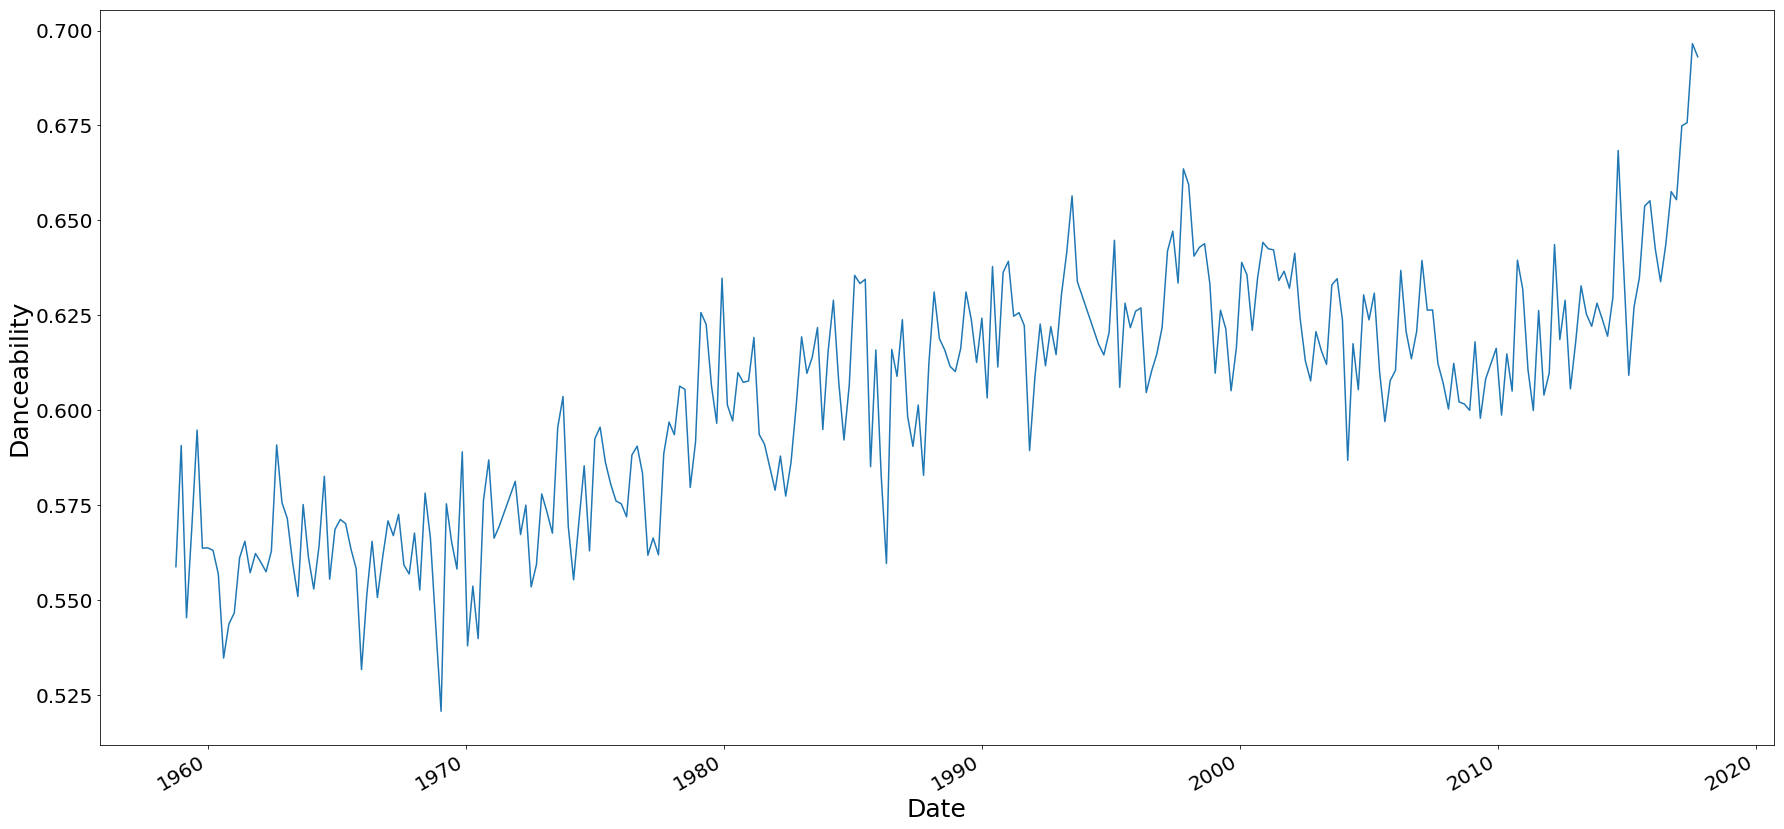

In [5]:
plot = top_100_c.danceability.plot(figsize=(30,15),fontsize=20)
plot.set_ylabel("Danceability",fontsize=25)
plot.set_xlabel("Date",fontsize=25)

Text(0.5,0,'Date')

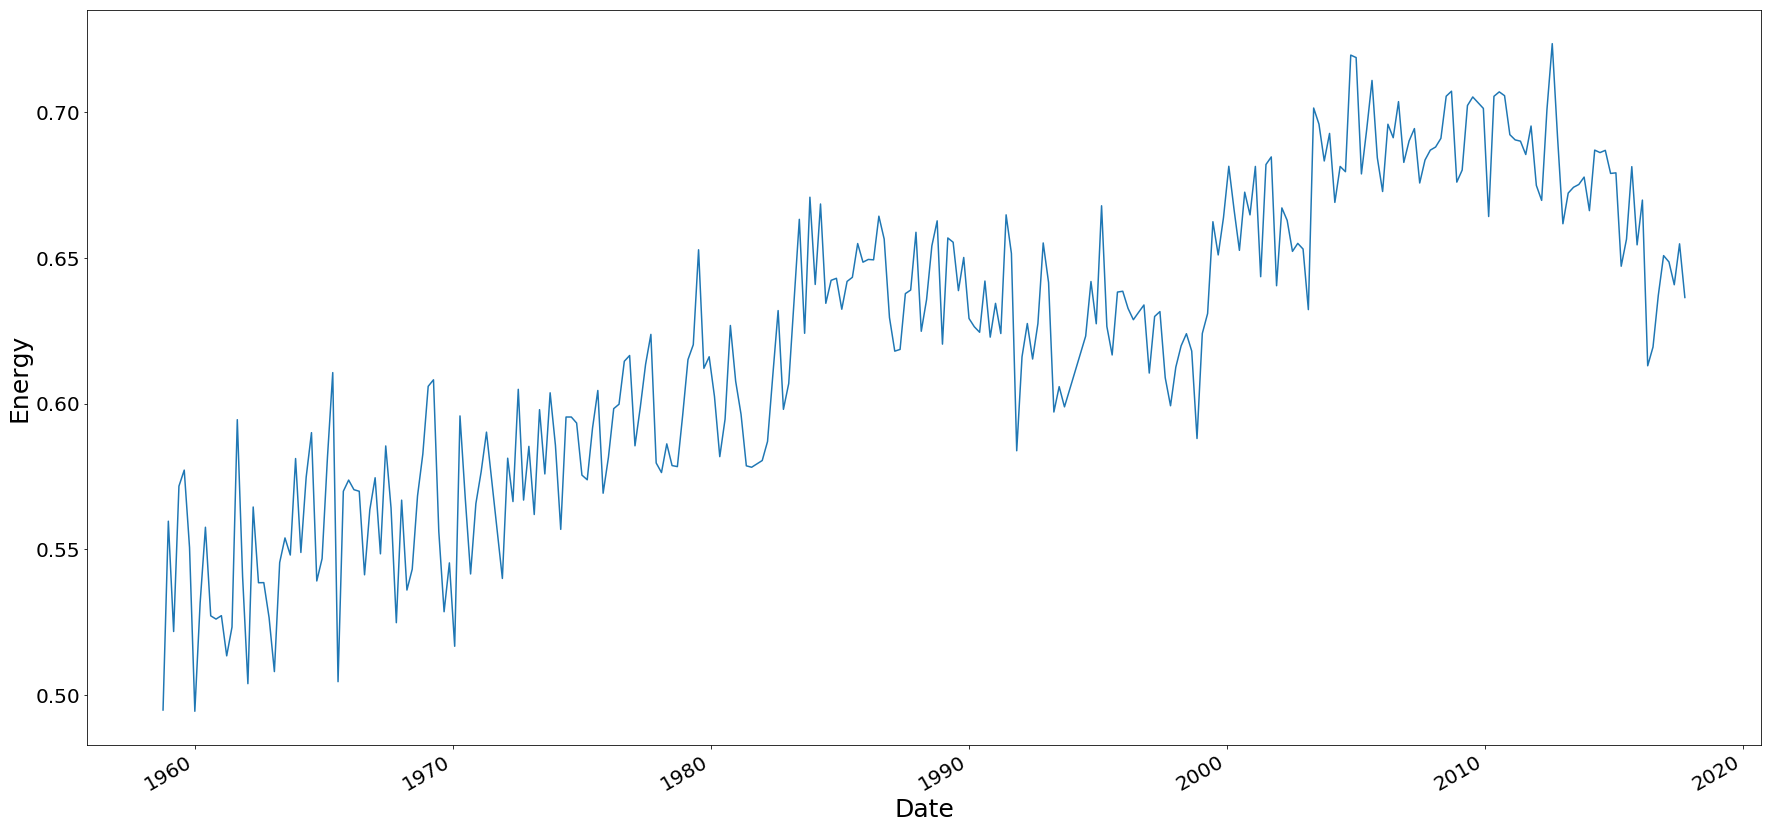

In [6]:
plot = top_100_c.energy.plot(figsize=(30,15),fontsize=20)
plot.set_ylabel("Energy",fontsize=25)
plot.set_xlabel("Date",fontsize=25)

Text(0.5,0,'Date')

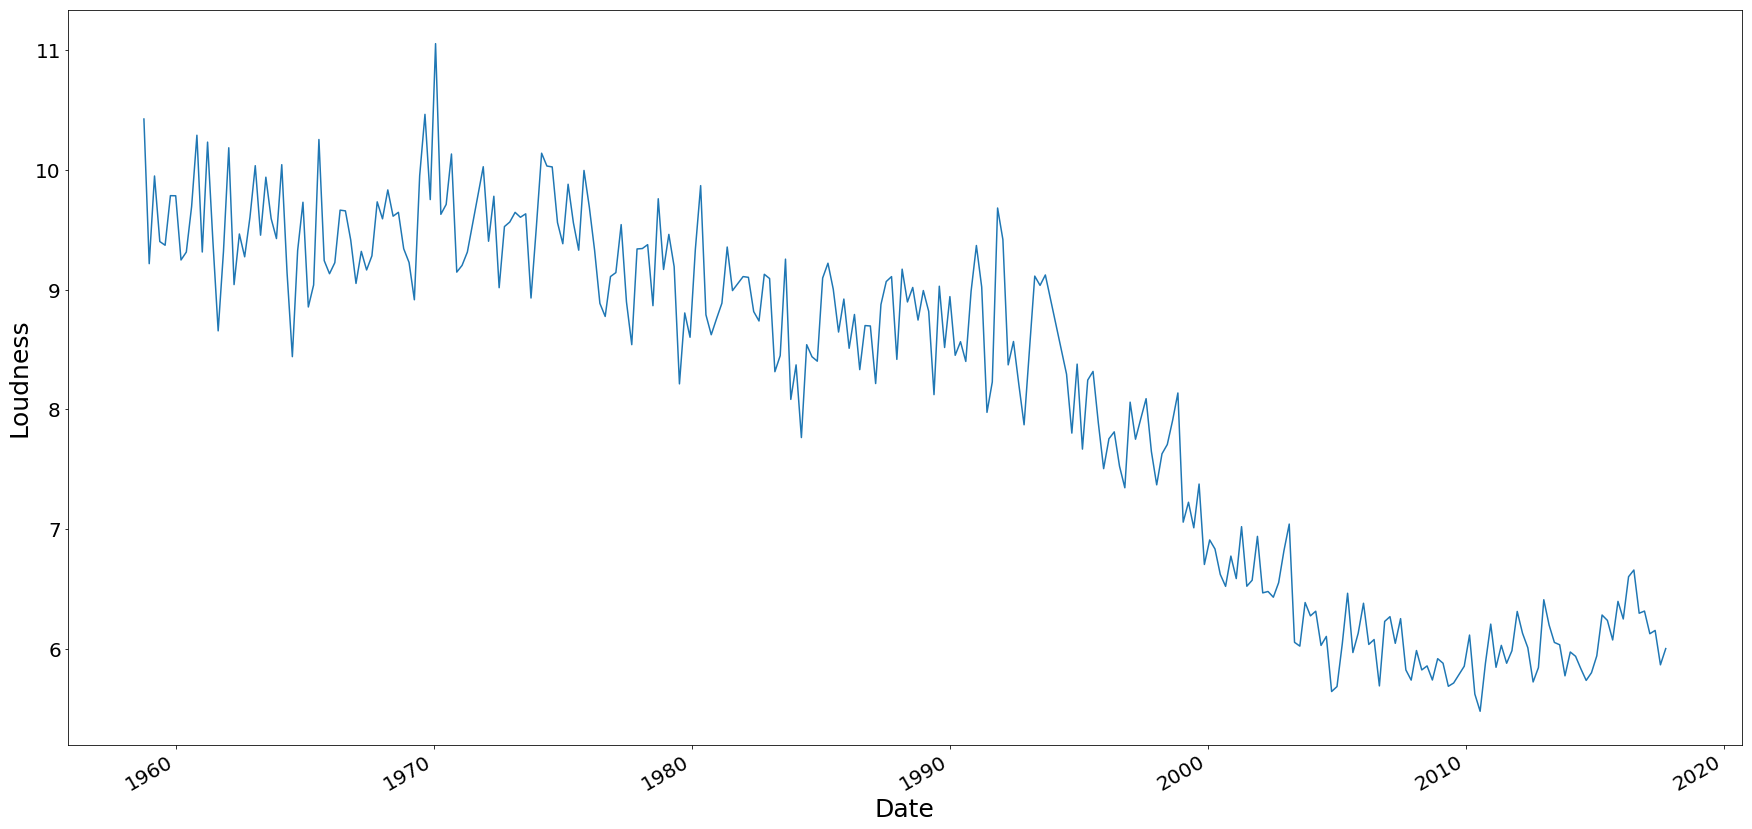

In [7]:
plot = top_100_c.loudness.plot(figsize=(30,15),fontsize=20)
plot.set_ylabel("Loudness",fontsize=25)
plot.set_xlabel("Date",fontsize=25)

Text(0.5,0,'Date')

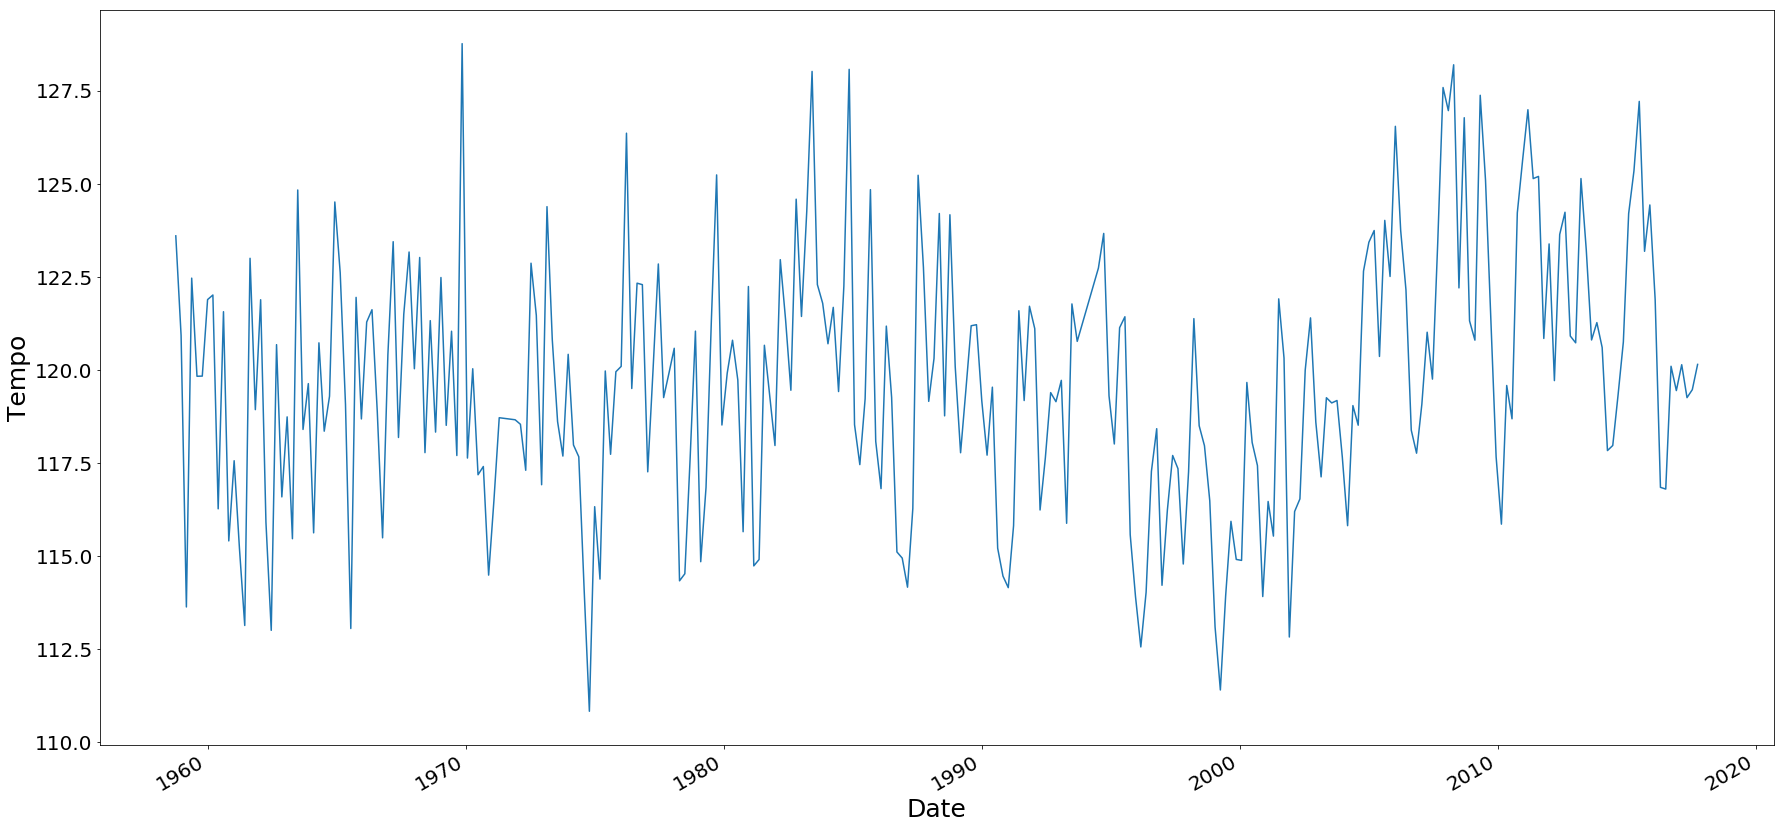

In [8]:
plot = top_100_c.tempo.plot(figsize=(30,15),fontsize=20)
plot.set_ylabel("Tempo",fontsize=25)
plot.set_xlabel("Date",fontsize=25)

Text(0.5,0,'Date')

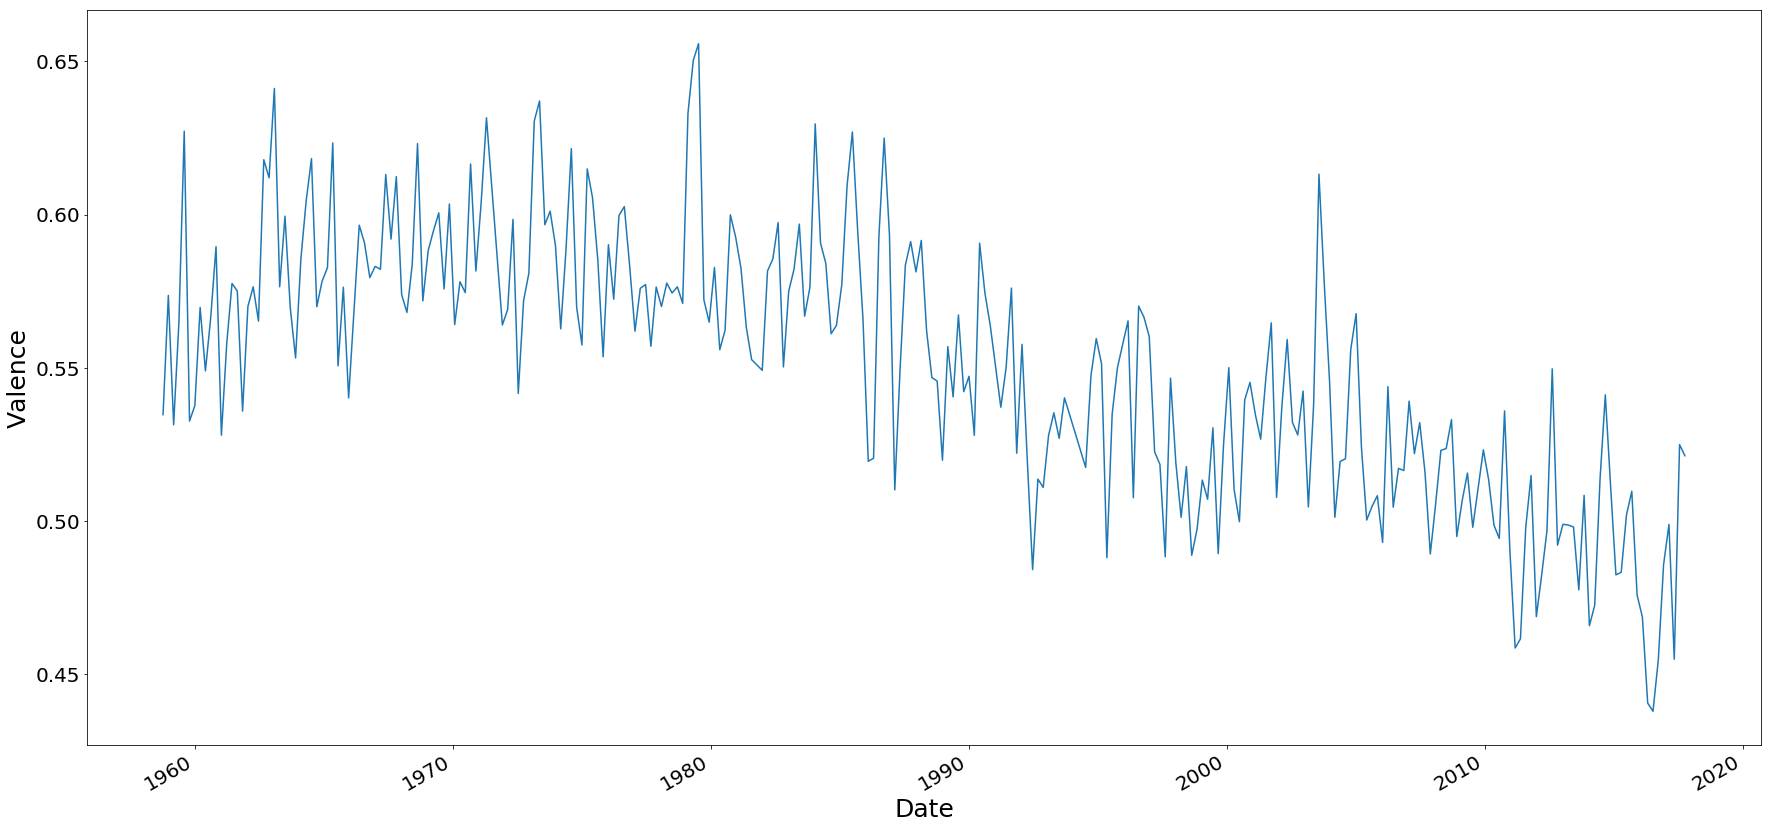

In [9]:
plot = top_100_c.valence.plot(figsize=(30,15),fontsize=20)
plot.set_ylabel("Valence",fontsize=25)
plot.set_xlabel("Date",fontsize=25)

### Data From The Last Decade

We came to realize after collecting data on the prevous century is that the features of songs from the 60's will have little to do with songs released within the last decade. The dataset for this portion of the notebook was retrieved in a near identical fashion to the century long dataset mentioned above. This dataset ranges from 2010 to the present and has a data at a resolution of every five days. A more detailed notebook on this process is included at the following endpoint, /Processing/Processing/billboard_past_decade 

In [31]:
#Import the csv file
top_100_d = pd.read_csv("billboard_100_last_decade_features.csv",na_values="Unnamed: 0")

#Convert indices to datetime objects 
top_100_d["Unnamed: 0"] = pd.to_datetime(top_100_d["Unnamed: 0"])

top_100_d.index = top_100_d["Unnamed: 0"]
del top_100_d["Unnamed: 0"]
#top_100_d.drop(top_100_d.index([[132]]))
top_100_d.drop(top_100_d.index[[132]], inplace=True)
top_100_d.index.name="Date"

Here's a glimpse at the data.

In [32]:
top_100_d.head()

,danceability,energy,loudness,tempo,valence
Date,,,,,
2010-01-01,0.61519,0.70464,5.55640,116.33526,0.51175
2010-01-06,0.61213,0.70425,5.62123,117.69281,0.51055
2010-01-11,0.61392,0.71338,5.33129,118.12413,0.51679
2010-01-16,0.61392,0.71338,5.33129,118.12413,0.51679
2010-01-21,0.61785,0.71103,5.34988,117.46047,0.52664


In [33]:
top_100_d.corr()

,danceability,energy,loudness,tempo,valence
danceability,1.000000,-0.584117,0.274314,-0.169650,-0.099235
energy,-0.584117,1.000000,-0.798301,0.187760,0.653444
loudness,0.274314,-0.798301,1.000000,0.075669,-0.635519
tempo,-0.169650,0.187760,0.075669,1.000000,0.010390
valence,-0.099235,0.653444,-0.635519,0.010390,1.000000


The charts that follow are line graphs that illustrate how audio features have changed over the last decade. 

Text(0.5,0,'Date')

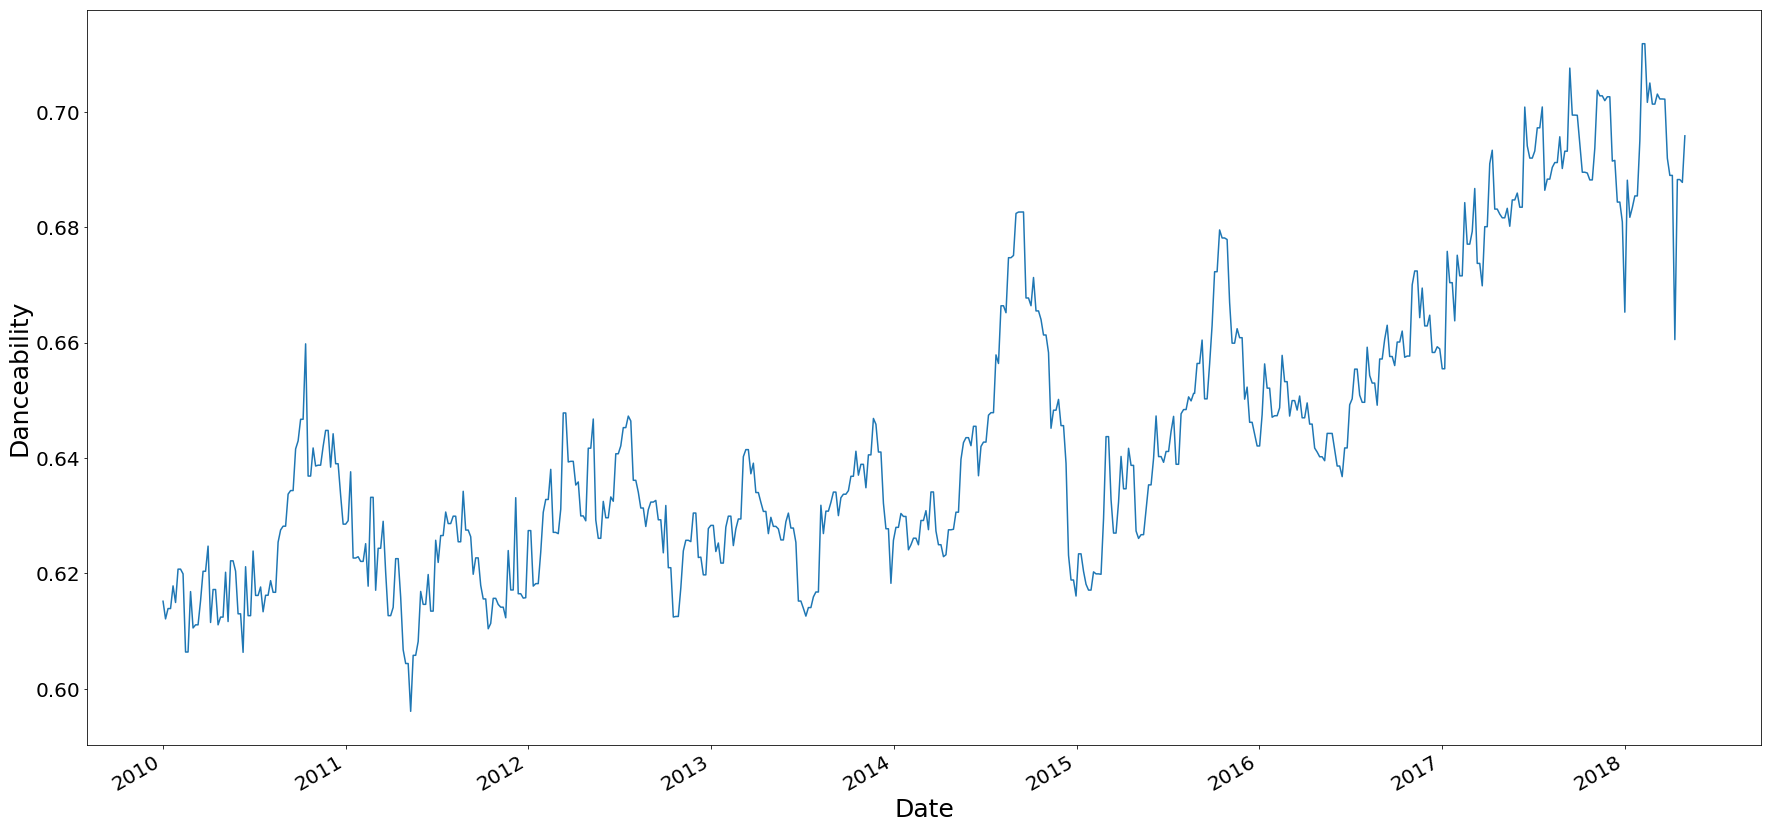

In [34]:
plot = top_100_d.danceability.plot(figsize=(30,15),fontsize=20)
plot.set_ylabel("Danceability",fontsize=25)
plot.set_xlabel("Date",fontsize=25)

Text(0.5,0,'Date')

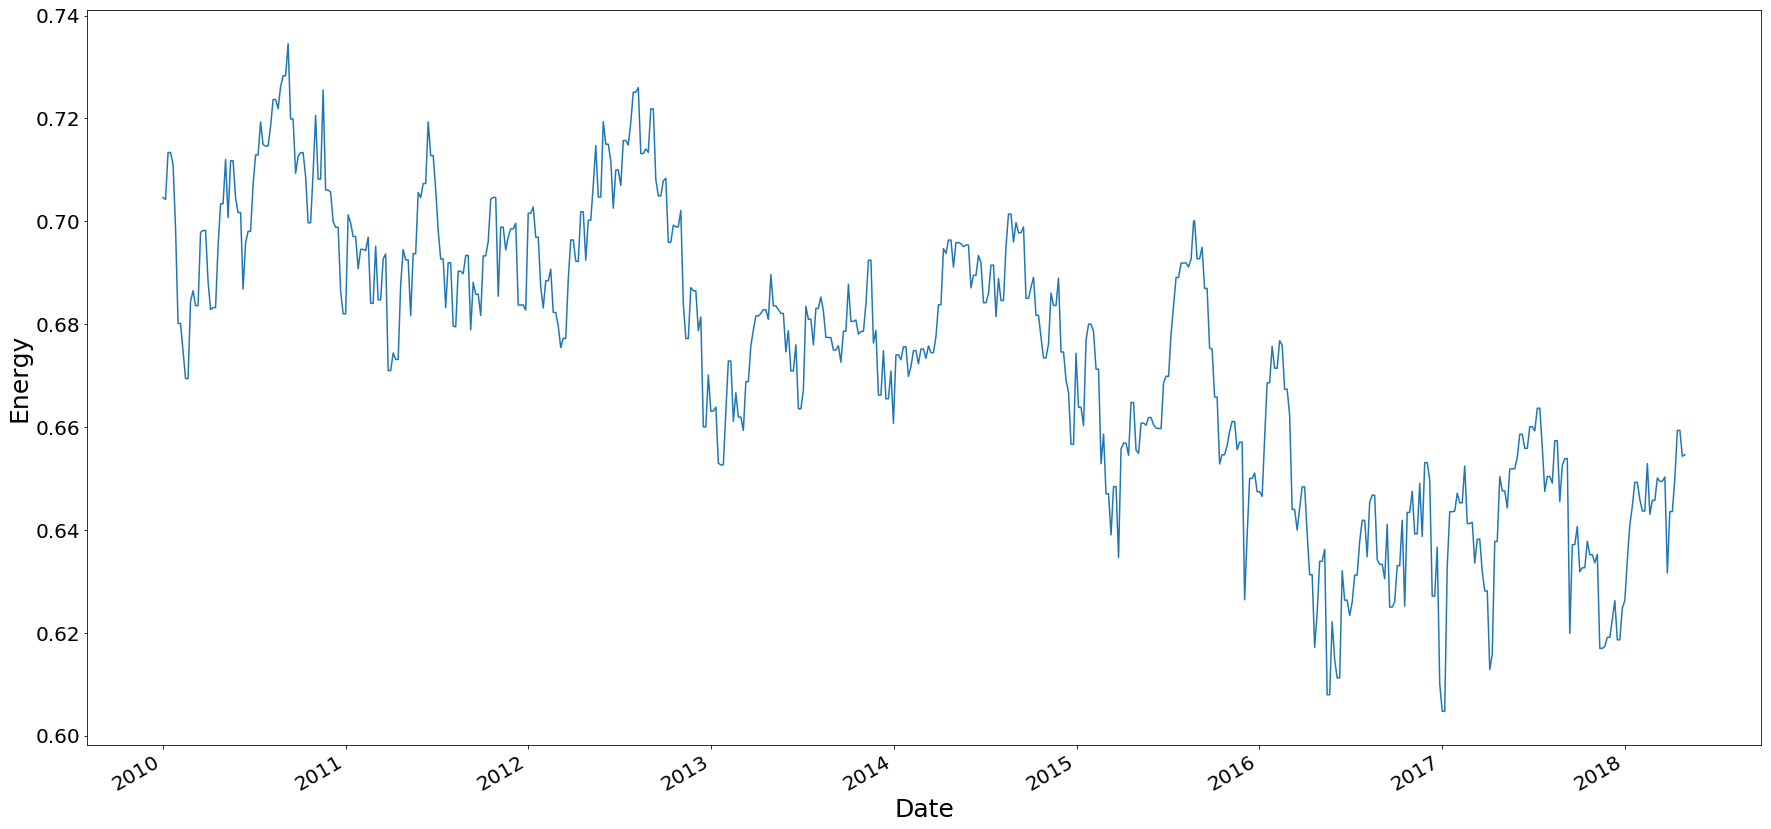

In [35]:
plot = top_100_d.energy.plot(figsize=(30,15),fontsize=20)
plot.set_ylabel("Energy",fontsize=25)
plot.set_xlabel("Date",fontsize=25)

Text(0.5,0,'Date')

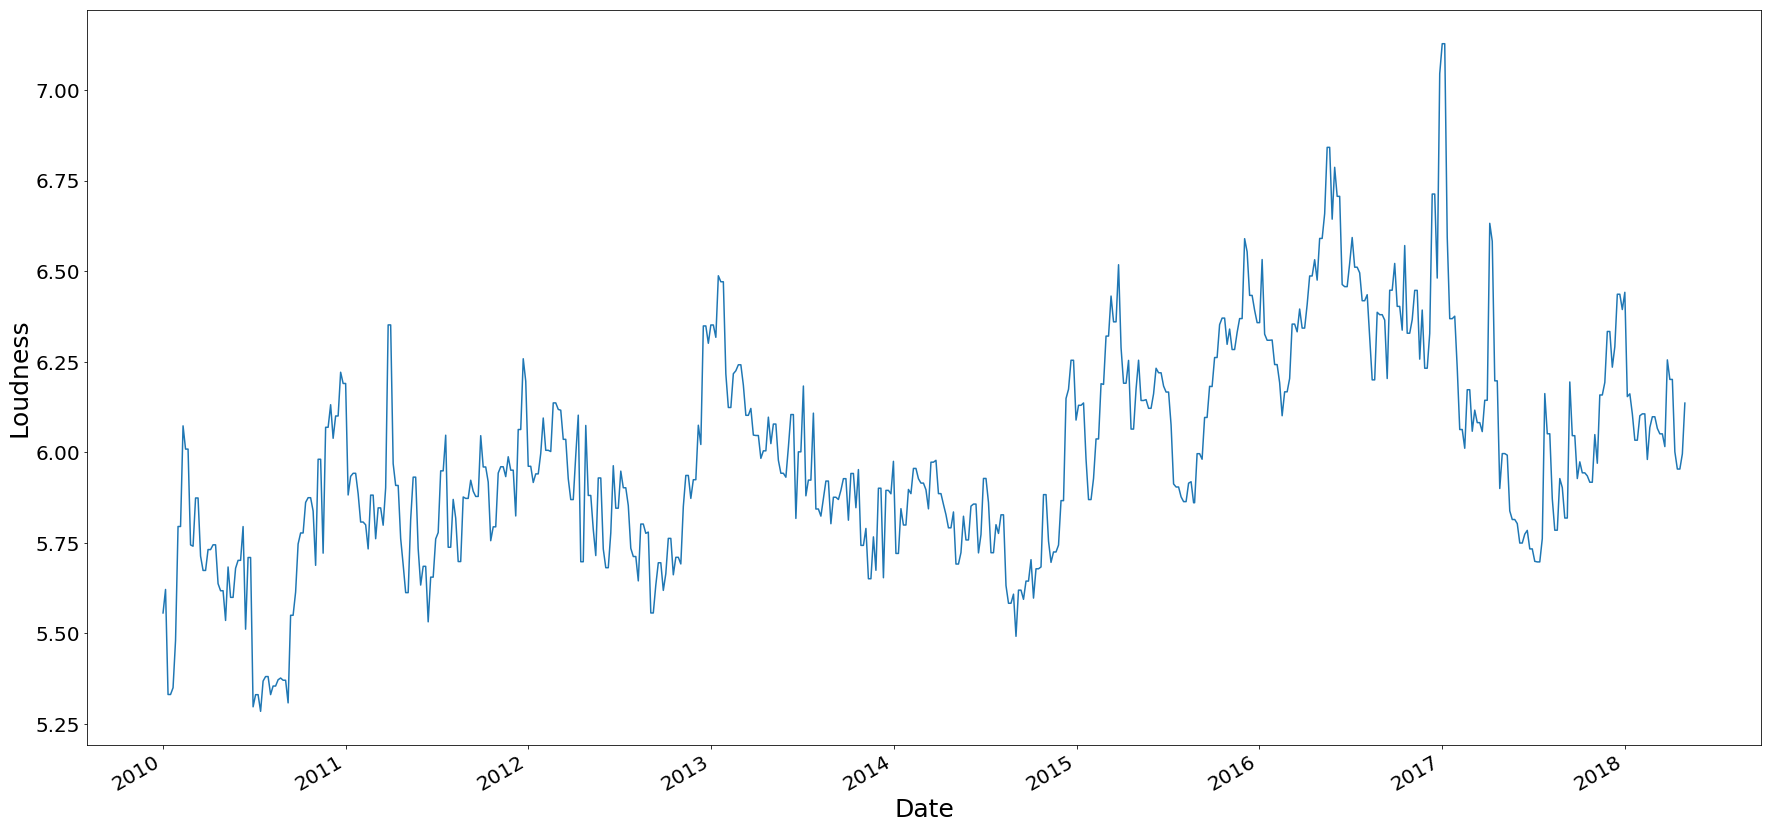

In [36]:
plot = top_100_d.loudness.plot(figsize=(30,15),fontsize=20)
plot.set_ylabel("Loudness",fontsize=25)
plot.set_xlabel("Date",fontsize=25)

Text(0.5,0,'Date')

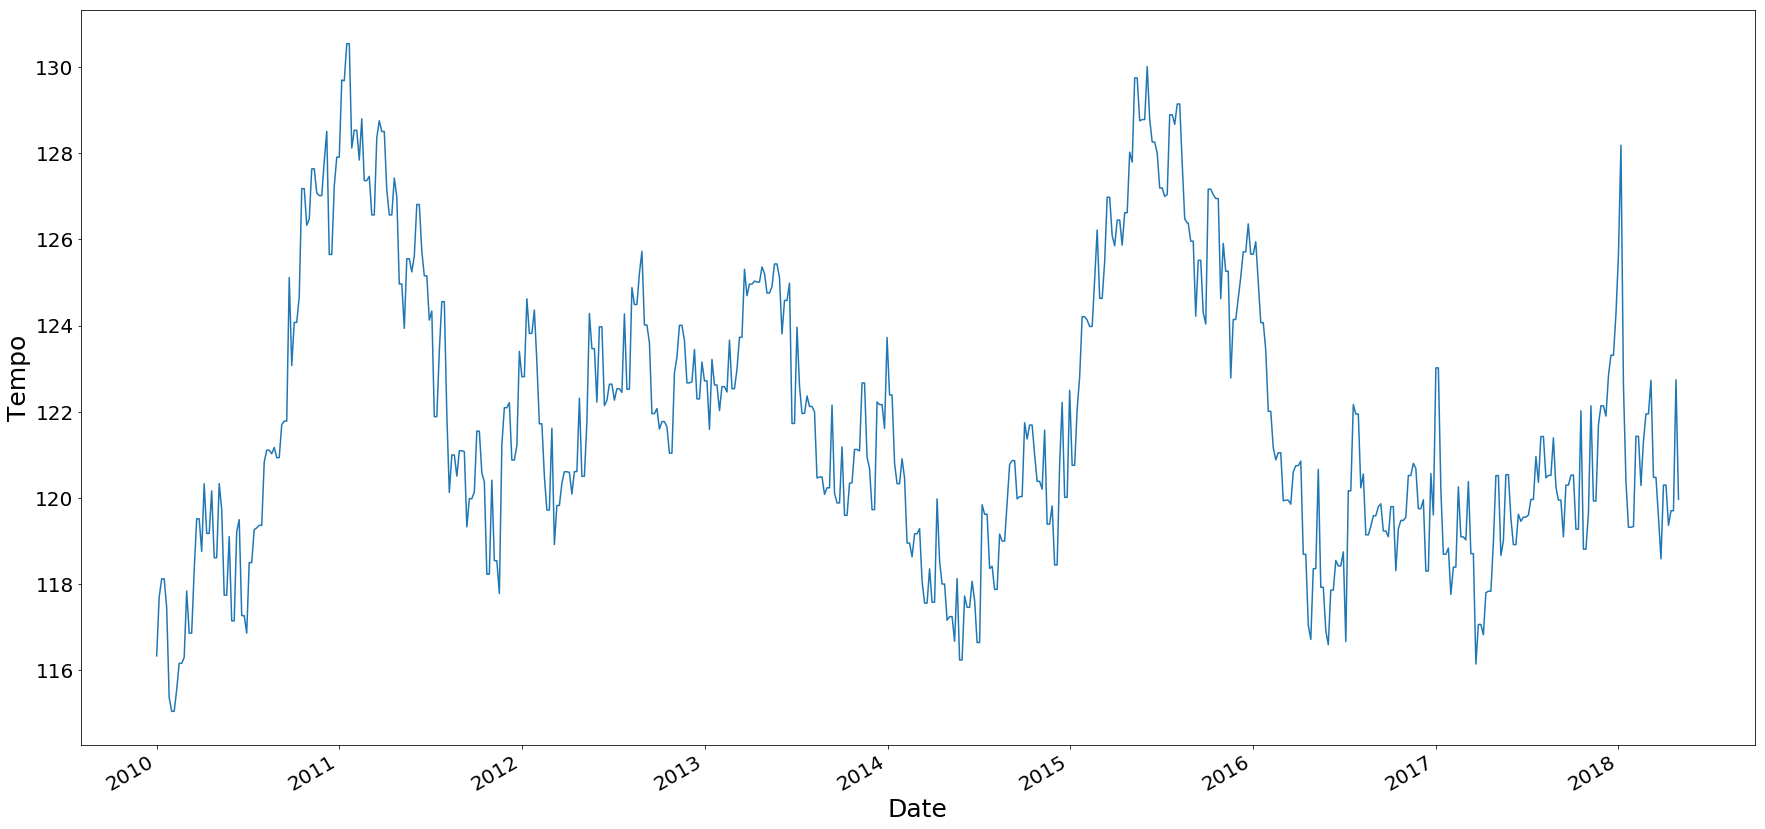

In [37]:
plot = top_100_d.tempo.plot(figsize=(30,15),fontsize=20)
plot.set_ylabel("Tempo",fontsize=25)
plot.set_xlabel("Date",fontsize=25)

Text(0.5,0,'Date')

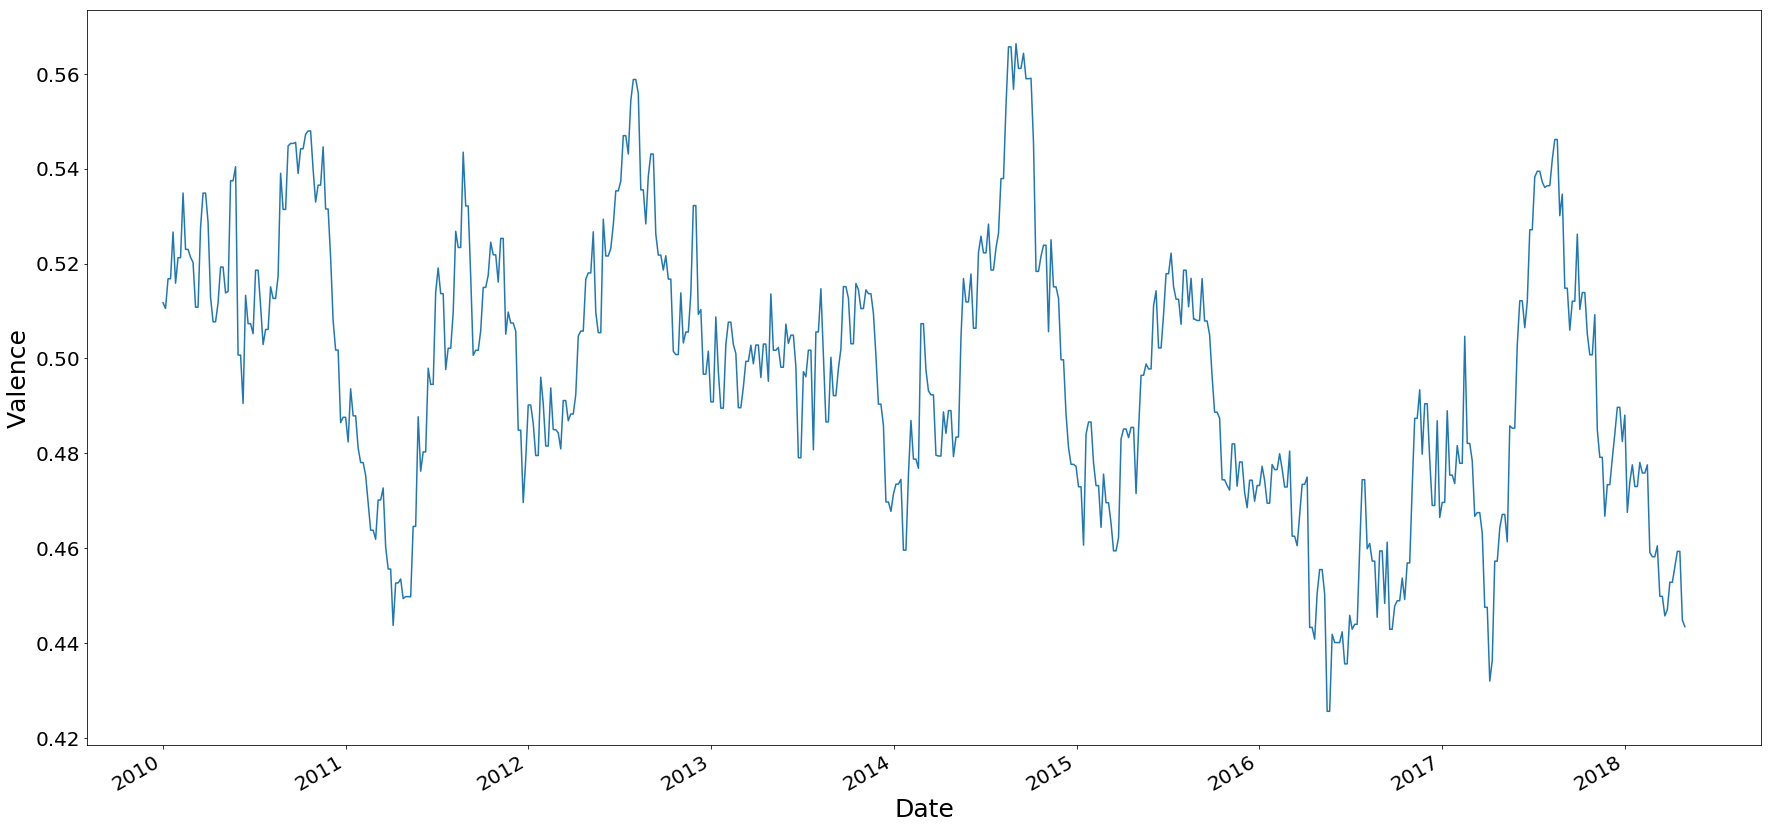

In [38]:
plot = top_100_d.valence.plot(figsize=(30,15),fontsize=20)
plot.set_ylabel("Valence",fontsize=25)
plot.set_xlabel("Date",fontsize=25)

/Applications/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


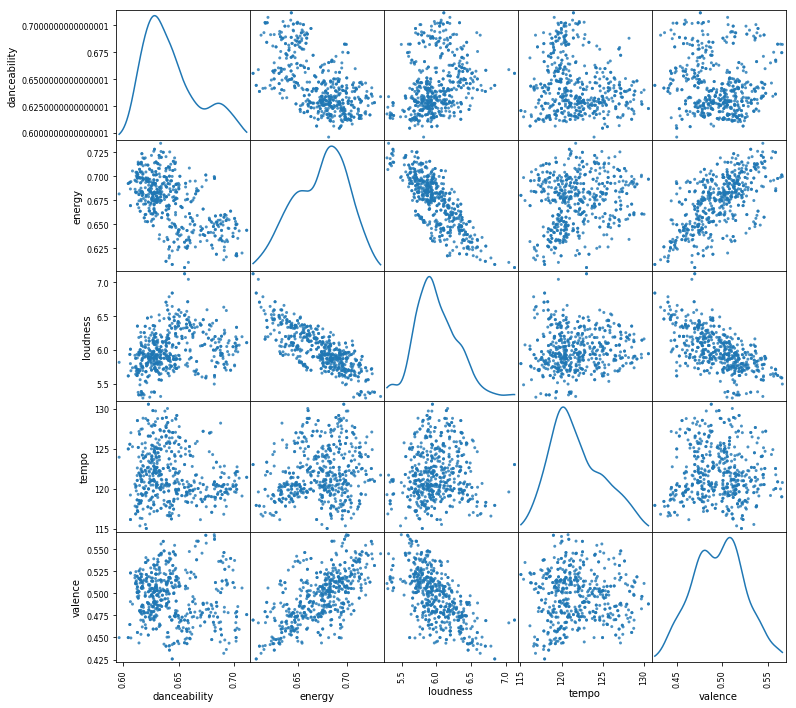

In [39]:
from pandas.tools.plotting import scatter_matrix
axeslist=scatter_matrix(top_100_d, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

In [46]:
from sklearn.linear_model import LinearRegression
z_scores=(top_100_d - top_100_d.mean())/top_100_d.std()  #z score!
z_scores.head()

normality = stats.normaltest(top_100_d)
stat = normality[0]
p_value = normality[1]
for i in range(len(stat)):
    print(stat[i], p_value[i])

56.09561666255136 6.591611644022092e-13
31.151760721048653 1.7198125295442087e-07
24.25205274392075 5.416685981972522e-06
31.74559019513793 1.2780053643319253e-07
9.23052754140167 0.00989957184555216


### Labeled Dataset for Modeling

The dataset we're going to do our on modeling is similar to the dataset for the prevoius decade described above. Aquiring a dataset that has a spread of popular and unpopular songs was difficult to come by, due to the lack of publication on avarage/unpopular songs. To rectify this issue we tried a new approach. The process is as follows. We began by collecting the Billboard Hot 100 songs since 2010 and created a set of unique songs. Each entry in the set was a tuple containing the tracks name and the highest point it reached in the charts. This set was then split where the top 30% are considered popular songs and the bottom 70% are considered unpopular songs. 

In [1]:
pop_songs = pd.read_csv("pop_features.csv")
unpop_songs = pd.read_csv("unpop_features.csv")

NameError: name 'pd' is not defined

A peak at the data.

In [6]:
pop_songs.head(3)

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,#Beautiful,0.21400,https://api.spotify.com/v1/audio-analysis/5TVi...,0.666,178242,0.677,5TVirkSwFEXF1nLJEebe2I,0.000000,2,0.0979,-5.743,1,0.0326,100.014,4,https://api.spotify.com/v1/tracks/5TVirkSwFEXF...,audio_features,spotify:track:5TVirkSwFEXF1nLJEebe2I,0.178
1,#SELFIE,0.01340,https://api.spotify.com/v1/audio-analysis/1HOl...,0.807,183750,0.916,1HOlb9rdNOmy9b1Fakicjo,0.000012,0,0.0787,-3.282,1,0.2260,127.973,4,https://api.spotify.com/v1/tracks/1HOlb9rdNOmy...,audio_features,spotify:track:1HOlb9rdNOmy9b1Fakicjo,0.651
2,#thatPOWER,0.00162,https://api.spotify.com/v1/audio-analysis/01Tu...,0.791,279507,0.615,01TuObJVd7owWchVRuQbQw,0.000065,6,0.0812,-6.149,0,0.0667,128.017,4,https://api.spotify.com/v1/tracks/01TuObJVd7ow...,audio_features,spotify:track:01TuObJVd7owWchVRuQbQw,0.393


In [7]:
unpop_songs.head(3)

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,'Til Summer Comes Around,0.5930,https://api.spotify.com/v1/audio-analysis/1CKm...,0.570,331467,0.629,1CKmI1IQjVEVB3F7VmJmM3,0.000136,9,0.770,-7.608,0,0.0331,127.907,4,https://api.spotify.com/v1/tracks/1CKmI1IQjVEV...,audio_features,spotify:track:1CKmI1IQjVEVB3F7VmJmM3,0.308
1,(Kissed You) Good Night,0.0807,https://api.spotify.com/v1/audio-analysis/3d1H...,0.523,232903,0.747,3d1Hbu6v1uJ2rTClxKYYRl,0.000000,11,0.110,-6.125,1,0.0292,118.970,4,https://api.spotify.com/v1/tracks/3d1Hbu6v1uJ2...,audio_features,spotify:track:3d1Hbu6v1uJ2rTClxKYYRl,0.294
2,***Flawless,0.2410,https://api.spotify.com/v1/audio-analysis/0zVM...,0.639,234413,0.659,0zVMzJ37VQNFUNvdxxat2E,0.000008,8,0.484,-7.273,1,0.2150,136.801,4,https://api.spotify.com/v1/tracks/0zVMzJ37VQNF...,audio_features,spotify:track:0zVMzJ37VQNFUNvdxxat2E,0.457


Here are the correlation coeficcients

In [8]:
pop_songs.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
acousticness,1.000000,-0.209423,-0.059028,-0.524611,0.144600,0.003880,-0.098602,-0.437863,0.171188,-0.066973,-0.193392,-0.119485,-0.123505
danceability,-0.209423,1.000000,-0.088485,-0.059738,0.025886,-0.014734,-0.044714,0.010974,-0.054364,0.232763,-0.141685,0.016333,0.262069
duration_ms,-0.059028,-0.088485,1.000000,-0.030599,0.019171,-0.101379,0.051038,-0.058923,-0.052217,-0.011699,-0.017198,0.015010,-0.148092
energy,-0.524611,-0.059738,-0.030599,1.000000,-0.031066,0.030672,0.187164,0.753910,-0.103234,-0.109173,0.192774,0.150343,0.372688
instrumentalness,0.144600,0.025886,0.019171,-0.031066,1.000000,0.037040,-0.033024,-0.073258,0.007097,0.010302,-0.024071,0.012132,-0.060360
key,0.003880,-0.014734,-0.101379,0.030672,0.037040,1.000000,-0.009109,0.030582,-0.227372,0.061085,0.001187,0.054965,0.057690
liveness,-0.098602,-0.044714,0.051038,0.187164,-0.033024,-0.009109,1.000000,0.119983,-0.019956,0.139523,0.136538,-0.018873,0.032271
loudness,-0.437863,0.010974,-0.058923,0.753910,-0.073258,0.030582,0.119983,1.000000,-0.086053,-0.151709,0.113535,0.085373,0.227834
mode,0.171188,-0.054364,-0.052217,-0.103234,0.007097,-0.227372,-0.019956,-0.086053,1.000000,-0.092018,-0.004889,-0.087112,-0.003115
speechiness,-0.066973,0.232763,-0.011699,-0.109173,0.010302,0.061085,0.139523,-0.151709,-0.092018,1.000000,0.188806,-0.025252,0.024432


In [9]:
unpop_songs.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
acousticness,1.000000,-0.122827,0.035897,-0.494252,0.104982,-0.031201,-0.077927,-0.381623,0.096627,-0.026431,-0.105929,-0.068527,-0.146410
danceability,-0.122827,1.000000,-0.068123,-0.046307,0.027409,0.001300,-0.080810,0.029426,-0.125765,0.223569,-0.136440,0.170988,0.248230
duration_ms,0.035897,-0.068123,1.000000,-0.107156,-0.006991,-0.010432,0.058528,-0.107715,-0.011355,-0.014368,0.001009,-0.051131,-0.205735
energy,-0.494252,-0.046307,-0.107156,1.000000,-0.114408,0.073622,0.206348,0.701874,-0.026557,-0.079241,0.180199,0.152721,0.467947
instrumentalness,0.104982,0.027409,-0.006991,-0.114408,1.000000,-0.008200,-0.001296,-0.279407,-0.009997,-0.042961,-0.025753,0.016665,-0.021443
key,-0.031201,0.001300,-0.010432,0.073622,-0.008200,1.000000,0.026677,0.042206,-0.129337,0.026123,0.038488,-0.028692,0.058246
liveness,-0.077927,-0.080810,0.058528,0.206348,-0.001296,0.026677,1.000000,0.088700,-0.001991,0.053588,0.005699,0.075326,0.093539
loudness,-0.381623,0.029426,-0.107715,0.701874,-0.279407,0.042206,0.088700,1.000000,-0.033089,-0.100469,0.109388,0.101768,0.280891
mode,0.096627,-0.125765,-0.011355,-0.026557,-0.009997,-0.129337,-0.001991,-0.033089,1.000000,-0.191006,0.026198,-0.049008,0.005691
speechiness,-0.026431,0.223569,-0.014368,-0.079241,-0.042961,0.026123,0.053588,-0.100469,-0.191006,1.000000,0.102881,0.098070,-0.000719
